In [ ]:
! pip3 install xgboost catboost lightgbm optuna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor


from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import optuna

In [2]:
df = pd.read_csv('train.csv')

# Data Inspection

In [3]:
df.head()

,SEQN,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,...,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50,y
0,969167,4,5,9,3,-0.181,-0.379,-0.164,0.080,0.378,...,-1.156,-0.730,-0.508,-0.497,0.224,0.412,-0.517,0.099,0.114,-1.315
1,188942,4,3,5,4,-0.126,1.603,1.021,0.489,-1.404,...,-0.318,1.240,-1.993,2.021,-1.078,-0.277,0.802,0.253,-0.720,1.997
2,134058,1,2,8,5,0.724,-0.702,2.249,0.910,0.330,...,0.449,1.980,-0.401,-0.544,-0.944,1.592,0.875,-0.734,-2.336,3.709
3,124022,3,3,10,6,0.706,-0.302,1.023,-0.895,0.625,...,2.025,-2.289,-0.407,0.025,-0.515,0.408,1.380,-1.075,-2.451,1.155
4,685285,5,5,1,5,-0.350,-1.001,0.931,0.192,0.491,...,-0.118,-0.288,0.457,-0.566,0.822,-0.317,0.661,2.096,0.004,-1.960


In [4]:
df.dtypes

SEQN                 int64
self_eval            int64
teacher_eval         int64
extracurricular      int64
district             int64
SRP_1              float64
SRP_2              float64
SRP_3              float64
SRP_4              float64
SRP_5              float64
SRP_6              float64
SRP_7              float64
SRP_8              float64
SRP_9              float64
SRP_10             float64
SRP_11             float64
SRP_12             float64
SRP_13             float64
SRP_14             float64
SRP_15             float64
SRP_16             float64
SRP_17             float64
SRP_18             float64
SRP_19             float64
SRP_20             float64
SRP_21             float64
SRP_22             float64
SRP_23             float64
SRP_24             float64
SRP_25             float64
SRP_26             float64
SRP_27             float64
SRP_28             float64
SRP_29             float64
SRP_30             float64
SRP_31             float64
SRP_32             float64
S

In [5]:
df.isna().sum()

SEQN               0
self_eval          0
teacher_eval       0
extracurricular    0
district           0
SRP_1              0
SRP_2              0
SRP_3              0
SRP_4              0
SRP_5              0
SRP_6              0
SRP_7              0
SRP_8              0
SRP_9              0
SRP_10             0
SRP_11             0
SRP_12             0
SRP_13             0
SRP_14             0
SRP_15             0
SRP_16             0
SRP_17             0
SRP_18             0
SRP_19             0
SRP_20             0
SRP_21             0
SRP_22             0
SRP_23             0
SRP_24             0
SRP_25             0
SRP_26             0
SRP_27             0
SRP_28             0
SRP_29             0
SRP_30             0
SRP_31             0
SRP_32             0
SRP_33             0
SRP_34             0
SRP_35             0
SRP_36             0
SRP_37             0
SRP_38             0
SRP_39             0
SRP_40             0
SRP_41             0
SRP_42             0
SRP_43       

In [6]:
df.self_eval.value_counts()

self_eval
4    1635
1    1618
5    1599
3    1574
2    1574
Name: count, dtype: int64

In [7]:
df.teacher_eval.value_counts()

teacher_eval
1    2448
2    1558
3    1536
4    1346
5    1112
Name: count, dtype: int64

In [8]:
df.extracurricular.value_counts()

extracurricular
2     838
6     837
5     832
9     812
8     797
10    795
3     789
4     775
7     769
1     756
Name: count, dtype: int64

In [9]:
df.district.value_counts()

district
2    1170
3    1158
5    1148
1    1137
7    1136
4    1128
6    1123
Name: count, dtype: int64

In [10]:
duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("There are duplicated rows in df.")
else:
    print("There are no duplicated rows in df.")


There are no duplicated rows in df.


In [3]:
numerical_features = ['self_eval', 'teacher_eval', 'extracurricular', 'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']
len(numerical_features)

53

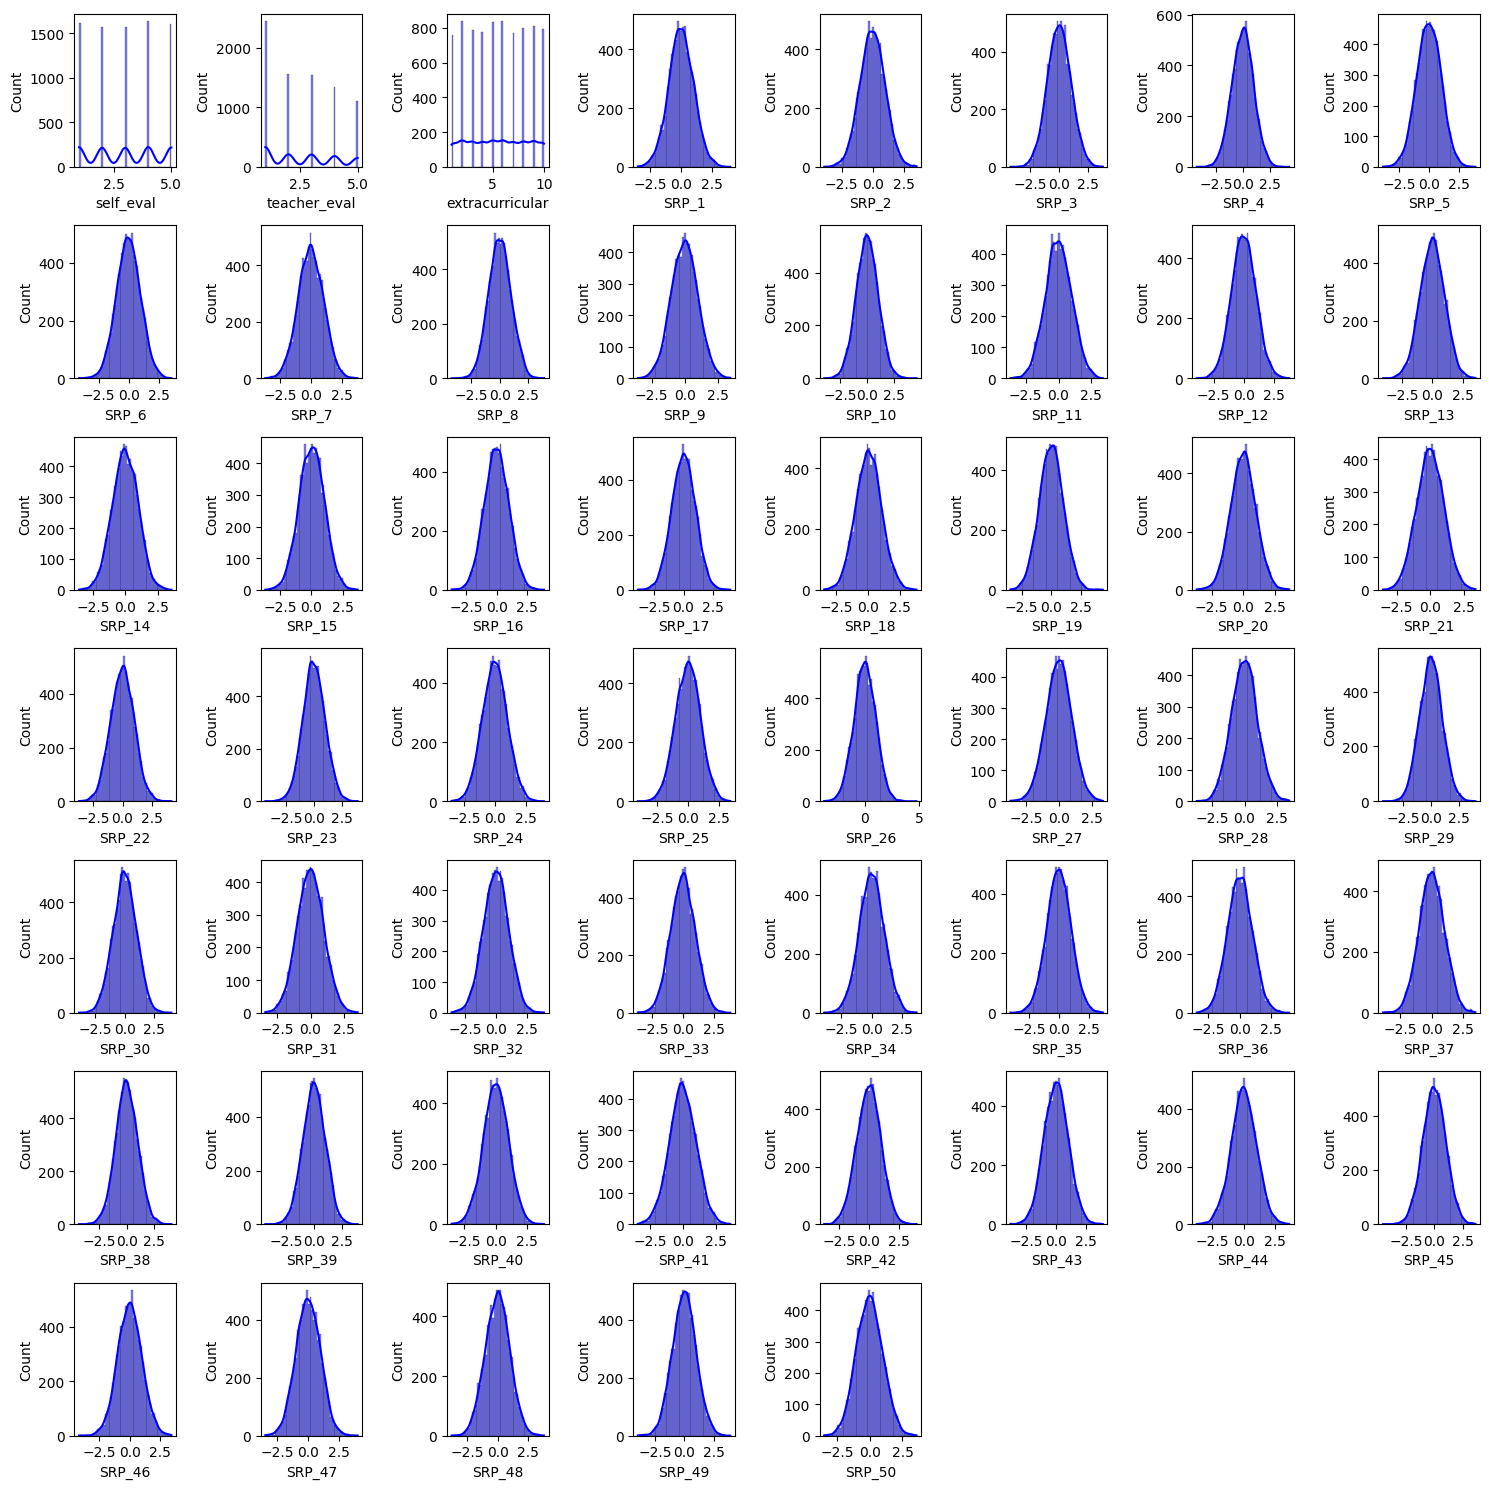

In [4]:
plt.figure(figsize=(15,15))

numerical_features = ['self_eval', 'teacher_eval', 'extracurricular', 'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']

for col in numerical_features:
    plt.subplot(7,8, numerical_features.index(col)+1)
    sns.histplot(df[col], color='b', bins=50, kde=True)

plt.tight_layout()
plt.show()

distribution of SRP's are quite normal

# Data Prepocessing

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = np.delete(X, self.columns_to_drop, axis=1)
        return X_transformed

In [4]:
# numerical_features = ['self_eval', 'teacher_eval', 'extracurricular', 'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']
numerical_features = ['SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']
categorical_features = ['district']
columns_to_drop = ['SEQN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  ## only scale the numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  ## one-hot encode the categorical features
        ('drop', 'drop', columns_to_drop)
    ], remainder='passthrough'  ## passthrough the remaining columns (if any)
        ) 

preproc_pipeline = Pipeline([
('preprocessor', preprocessor),  ## prevent data leakage for each fold
# ('drop_columns', ColumnDropper(columns_to_drop=[53,55,57,59]))
])

In [5]:
X = df.drop(['y'], axis=1)
y = df['y']

In [6]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preproc_pipeline.fit_transform(X_train)
X_test = preproc_pipeline.transform(X_test)  # prevent data leakage

In [11]:
X_train.shape

(6400, 60)

# ML Modeling Without Tuning

## train test score

In [ ]:
# Initialize the models and fit them to the training data
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

svm_regression = SVR()
svm_regression.fit(X_train, y_train)

lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train)

# Use the trained models to make predictions on the testing data
linear_regression_predictions = linear_regression.predict(X_test)
knn_predictions = knn.predict(X_test)
xgboost_predictions = xgboost.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
catboost_predictions = catboost.predict(X_test)
svm_regression_predictions = svm_regression.predict(X_test)
lightgbm_predictions = lightgbm.predict(X_test)

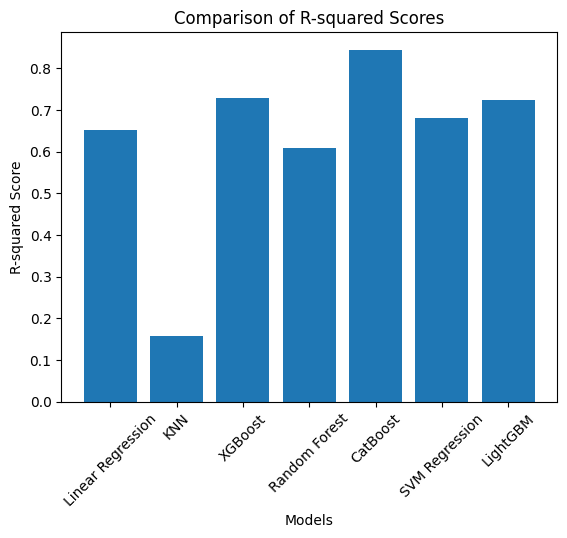

In [16]:
# Compute R-squared for each model
r2_list = []
r2_list.append(r2_score(y_test, linear_regression_predictions))
r2_list.append(r2_score(y_test, knn_predictions))
r2_list.append(r2_score(y_test, xgboost_predictions))
r2_list.append(r2_score(y_test, random_forest_predictions))
r2_list.append(r2_score(y_test, catboost_predictions))
r2_list.append(r2_score(y_test, svm_regression_predictions))
r2_list.append(r2_score(y_test, lightgbm_predictions))


# Plot the R-squared scores
models = ['Linear Regression', 'KNN', 'XGBoost', 'Random Forest', 'CatBoost', 'SVM Regression', 'LightGBM']
plt.bar(models, r2_list)
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.title('Comparison of R-squared Scores')
plt.show()


## Cross-Validation Score

In [7]:
# Create a list of all the regressors

regressors = [
    XGBRegressor(verbose=0, random_state=42), RandomForestRegressor(verbose=0, random_state=42), CatBoostRegressor(verbose=0, random_state=42), 
    SVR(verbose=0), LGBMRegressor(verbose=0, random_state=42),
    MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, random_state=42)]
cv_scores = []

# Perform 5-fold cross-validation for each regressor
for regressor in regressors:
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    # ('drop_columns', ColumnDropper(columns_to_drop=[1, 53,55,57,59])),
    ('regressor', regressor)
])
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    cv_scores.append(scores)



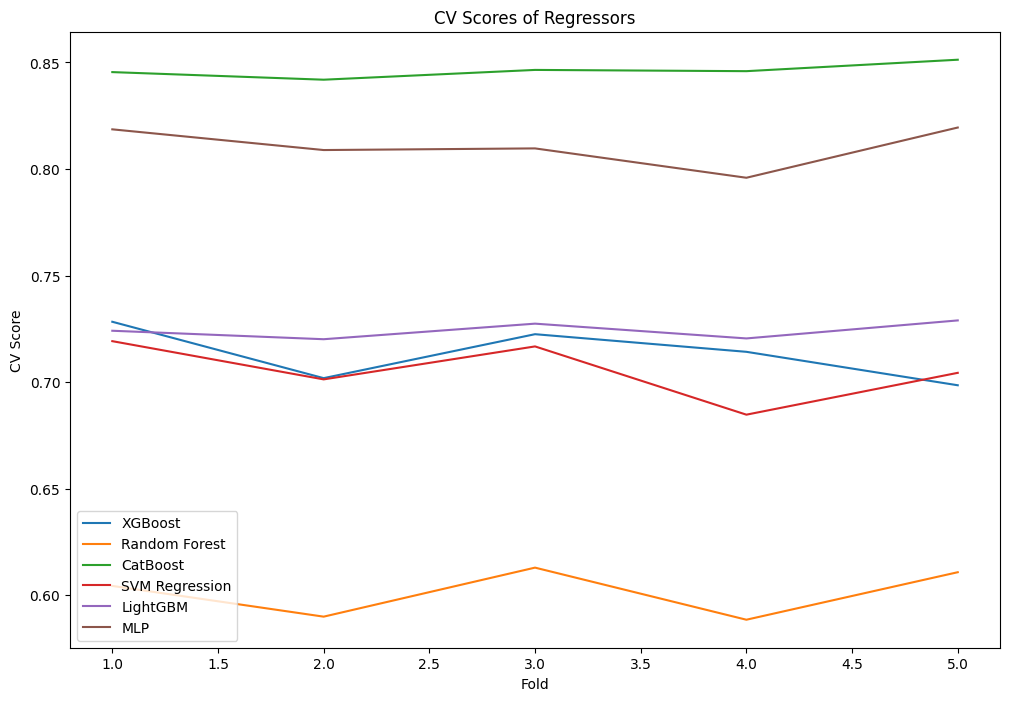

In [9]:
# Create a list of regressor names
plt.figure(figsize=(12, 8))

regressor_names = ['XGBoost', 'Random Forest', 'CatBoost', 'SVM Regression', 'LightGBM', 'MLP']
# Plot the cv_scores for each regressor
for i in range(len(regressor_names)):
    plt.plot(range(1, 6), cv_scores[i], label=regressor_names[i])

# Add labels and title to the plot
plt.xlabel('Fold')
plt.ylabel('CV Score')
plt.title('CV Scores of Regressors')
plt.legend()

# Show the plot
plt.show()


In [10]:
# do not standardize first 3
np.mean(cv_scores, axis=1)

array([0.71308571, 0.60132017, 0.84621276, 0.70527079, 0.72422696,
       0.81050898])

Only focus on tuning catboost and mlp

## Look at Learning Curve of MLP

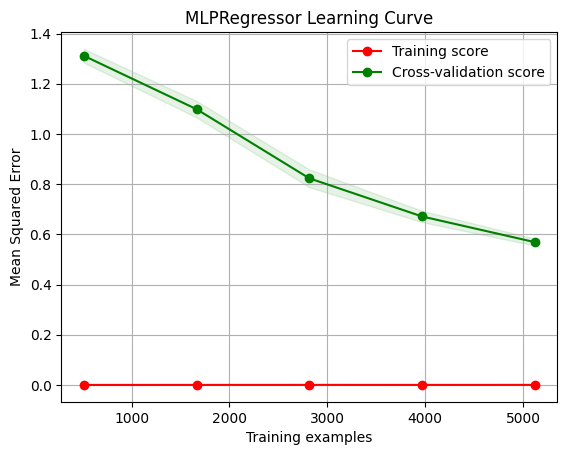

In [45]:
from sklearn.model_selection import learning_curve

mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=1000, random_state=42)


train_sizes, train_scores, test_scores = learning_curve(
    mlp_regressor, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("MLPRegressor Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.grid()
plt.show()

## Look at Learning Curve of Catboost

In [22]:
cat_default = CatBoostRegressor(verbose=0, random_state=42, eval_metric='R2', iterations=1000, early_stopping_rounds=10)
cat_default.fit(X_train, y_train,eval_set=[(X_test, y_test)])

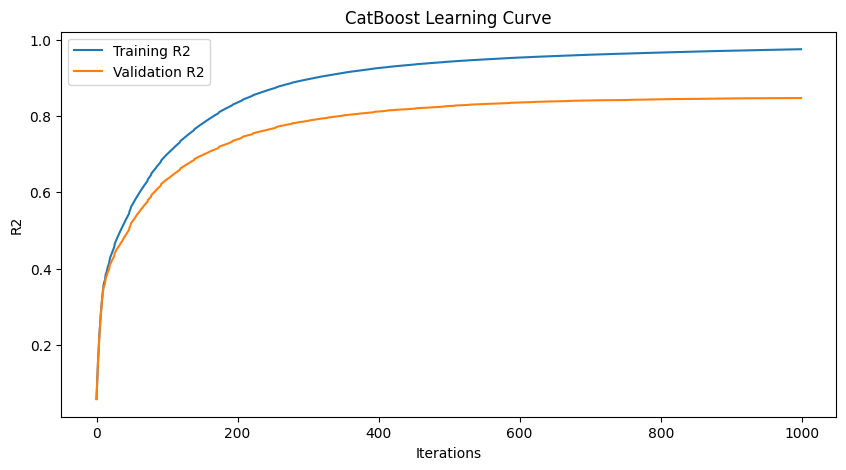

In [23]:
evals_result = cat_default.get_evals_result()

plt.figure(figsize=(10, 5))
plt.plot(evals_result['learn']['R2'], label='Training R2')
plt.plot(evals_result['validation']['R2'], label='Validation R2')
plt.title('CatBoost Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.legend()
plt.show()


# Hyperparam Tuning of MLP

In [7]:
def log_trial_mlp(study, trial):
    with open("optuna_trials_mlp_0410.log", "a") as f:
        f.write(f"Trial {trial.number}, Params: {trial.params}, Value: {trial.value}\n")


In [15]:
def objective(trial):

    params = {
        # 'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(10,), (20,10), (30,20,10)]),
        'hidden_layer_sizes': (10,),
        'activation':'tanh',
        'alpha': trial.suggest_float('alpha', 0.0001, 0.1, log=True),
        'solver': 'adam',
        'learning_rate': 'adaptive',
        # 'random_state': trial.suggest_int('random_state', 0, 1000, step=50)
    }

    regressor = MLPRegressor(**params, max_iter = 100, verbose=0, random_state=606)
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    ('regressor', regressor)
])

    cv = KFold(n_splits=5, shuffle=True, random_state=8888)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    
    return np.mean(scores)

In [16]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
study = optuna.create_study(pruner=pruner ,direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar = True, callbacks=[log_trial_mlp])

[I 2024-04-10 14:00:21,802] A new study created in memory with name: no-name-07db04b2-f887-4ae5-b59b-a778a8ea53df


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-04-10 14:00:36,367] Trial 0 finished with value: 0.8553814920301734 and parameters: {'hidden_layer_sizes': (20, 10), 'alpha': 0.023317312540365256, 'random_state': 400}. Best is trial 0 with value: 0.8553814920301734.
[I 2024-04-10 14:00:44,135] Trial 1 finished with value: 0.8583471058353425 and parameters: {'hidden_layer_sizes': (10,), 'alpha': 0.0906743423245745, 'random_state': 0}. Best is trial 1 with value: 0.8583471058353425.
[I 2024-04-10 14:00:59,020] Trial 2 finished with value: 0.8524610514300479 and parameters: {'hidden_layer_sizes': (20, 10), 'alpha': 0.06516657861158065, 'random_state': 0}. Best is trial 1 with value: 0.8583471058353425.
[I 2024-04-10 14:01:23,649] Trial 3 finished with value: 0.8301581063427047 and parameters: {'hidden_layer_sizes': (30, 20, 10), 'alpha': 0.0013066960900985974, 'random_state': 700}. Best is trial 1 with value: 0.8583471058353425.


In [32]:
print('Best trial:', study.best_trial.params)

Best trial: {'alpha': 0.09991969600005995}


In [33]:
def objective(trial):

    params = {
        'hidden_layer_sizes': (10,),
        'activation':'tanh',
        'alpha': 0.09991969600005995,
        'solver': 'adam',
        'learning_rate': 'adaptive',
        'max_iter': trial.suggest_int('max_iter', 100, 150)
    }

    regressor = MLPRegressor(**params, verbose=0, random_state=42)
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    # ('drop_columns', ColumnDropper(columns_to_drop=[53,55,57,59])),
    ('regressor', regressor)
])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    
    return np.mean(scores)

In [34]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
study = optuna.create_study(pruner=pruner ,direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar = True, callbacks=[log_trial_mlp])

[I 2024-04-09 00:40:17,289] A new study created in memory with name: no-name-466f4730-2332-4a1d-b277-396d926f23fb


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2024-04-09 00:40:24,747] Trial 0 finished with value: 0.871250420940424 and parameters: {'max_iter': 137}. Best is trial 0 with value: 0.871250420940424.
[I 2024-04-09 00:40:32,115] Trial 1 finished with value: 0.8705932771634686 and parameters: {'max_iter': 145}. Best is trial 0 with value: 0.871250420940424.
[I 2024-04-09 00:40:37,800] Trial 2 finished with value: 0.8727463288501351 and parameters: {'max_iter': 101}. Best is trial 2 with value: 0.8727463288501351.
[I 2024-04-09 00:40:43,157] Trial 3 finished with value: 0.8725948387236642 and parameters: {'max_iter': 105}. Best is trial 2 with value: 0.8727463288501351.
[I 2024-04-09 00:40:49,077] Trial 4 finished with value: 0.8719220442916615 and parameters: {'max_iter': 112}. Best is trial 2 with value: 0.8727463288501351.
[I 2024-04-09 00:40:54,654] Trial 5 finished with value: 0.8727197309783797 and parameters: {'max_iter': 110}. Best is trial 2 with value: 0.8727463288501351.
[I 2024-04-09 00:41:00,323] Trial 6 finished with

In [35]:
print('Best trial:', study.best_trial.params)

Best trial: {'max_iter': 101}


In [8]:
def objective(trial):

    params = {
        'hidden_layer_sizes': (10,),
        'activation':'tanh',
        'alpha': 0.09991969600005995,
        'solver': 'adam',
        'learning_rate': 'adaptive',
        'max_iter': trial.suggest_int('max_iter', 100, 1000, step=50),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 0.0001, 0.01, log=True)
        # 'random_state': trial.suggest_int('random_state', 0, 1000)
    }

    regressor = MLPRegressor(**params, verbose=0, random_state=42)
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    # ('drop_columns', ColumnDropper(columns_to_drop=[53,55,57,59])),
    ('regressor', regressor)
])

    cv = KFold(n_splits=5, shuffle=True, random_state=606)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    
    return np.mean(scores)

In [9]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
study = optuna.create_study(pruner=pruner ,direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar = True, callbacks=[log_trial_mlp])

[I 2024-04-10 14:32:06,690] A new study created in memory with name: no-name-64ce12a3-5aa4-43e5-993c-a5c2fddf1048


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-04-10 14:32:14,589] Trial 0 finished with value: 0.8726542762131165 and parameters: {'max_iter': 100, 'learning_rate_init': 0.0013276604934015237}. Best is trial 0 with value: 0.8726542762131165.
[I 2024-04-10 14:32:20,197] Trial 1 finished with value: 0.862315302563071 and parameters: {'max_iter': 700, 'learning_rate_init': 0.007351810061256967}. Best is trial 0 with value: 0.8726542762131165.
[I 2024-04-10 14:32:39,278] Trial 2 finished with value: 0.8309494998884617 and parameters: {'max_iter': 250, 'learning_rate_init': 0.00017904055579467463}. Best is trial 0 with value: 0.8726542762131165.
[I 2024-04-10 14:32:52,349] Trial 3 finished with value: 0.8710301916192786 and parameters: {'max_iter': 650, 'learning_rate_init': 0.0010022897474493123}. Best is trial 0 with value: 0.8726542762131165.
[I 2024-04-10 14:33:04,343] Trial 4 finished with value: 0.8699982280049754 and parameters: {'max_iter': 250, 'learning_rate_init': 0.0012995351730457332}. Best is trial 0 with value: 0

In [10]:
print('Best trial:', study.best_trial.params)

Best trial: {'max_iter': 750, 'learning_rate_init': 0.0002942641161353928}


In [11]:
best_mlp_params = {'max_iter': 750, 'learning_rate_init': 0.0002942641161353928,'hidden_layer_sizes': (10,),'activation':'tanh','alpha': 0.09991969600005995,'solver': 'adam','learning_rate': 'adaptive'}

# Hyperparam Tuning of Catboost

In [32]:
optuna.logging.set_verbosity(optuna.logging.INFO)

In [33]:
def log_trial(study, trial):
    with open("optuna_trials_0408.log", "a") as f:
        f.write(f"Trial {trial.number}, Params: {trial.params}, Value: {trial.value}\n")


In [140]:
def objective(trial):

    params = {
        # "learning_rate": trial.suggest_float("learning_rate", 0.2, 0.5),
        "depth": trial.suggest_int("depth", 3, 8),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.8, 1.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.8, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 30, 100),
        # "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1, 10),
        "grow_policy": trial.suggest_categorical("grow_policy", ["Depthwise", "Lossguide", "SymmetricTree"]),
    }

    regressor = CatBoostRegressor(**params, iterations = 100, verbose=0, random_state=42)
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    # ('drop_columns', ColumnDropper(columns_to_drop=[53,55,57,59])),
    ('regressor', regressor)
])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    
    return np.mean(scores)

In [142]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
study = optuna.create_study(pruner=pruner ,direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar = True, callbacks=[log_trial])

[I 2024-04-08 22:56:28,596] A new study created in memory with name: no-name-17f50afe-0717-4b20-8ae9-7d936ae38a9d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-04-08 22:56:32,170] Trial 0 finished with value: 0.8216737940518326 and parameters: {'depth': 5, 'colsample_bylevel': 0.8495459697458538, 'bagging_temperature': 0.964154663526558, 'min_data_in_leaf': 75, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.8216737940518326.
[I 2024-04-08 22:56:37,710] Trial 1 finished with value: 0.7324403749918604 and parameters: {'depth': 8, 'colsample_bylevel': 0.9096948087043615, 'bagging_temperature': 0.9256680231066502, 'min_data_in_leaf': 86, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 0.8216737940518326.
[I 2024-04-08 22:56:40,060] Trial 2 finished with value: 0.76926843980783 and parameters: {'depth': 4, 'colsample_bylevel': 0.9741182792472647, 'bagging_temperature': 0.8795269845878297, 'min_data_in_leaf': 51, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 0.8216737940518326.
[I 2024-04-08 22:56:41,710] Trial 3 finished with value: 0.814393131883049 and parameters: {'depth': 4, 'colsample_bylevel': 0.87

In [143]:
print('Best trial:', study.best_trial.params)

Best trial: {'depth': 5, 'colsample_bylevel': 0.8802565737712545, 'bagging_temperature': 0.8813483818667432, 'min_data_in_leaf': 48, 'grow_policy': 'SymmetricTree'}


In [144]:
def objective(trial):

    params = {
        "depth": 5,
        "colsample_bylevel": 0.8802565737712545,
        "bagging_temperature": 0.8813483818667432,
        "min_data_in_leaf": 48,
        "grow_policy": 'SymmetricTree',
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.03, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 15000, 20000, step=1000),
    }

    regressor = CatBoostRegressor(**params, verbose=0, random_state=42)
    cv_pipeline = Pipeline([
    ('preprocessor', preprocessor),  ## prevent data leakage for each fold
    # ('drop_columns', ColumnDropper(columns_to_drop=[53,55,57,59])),
    ('regressor', regressor)
])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(cv_pipeline, X, y, cv=cv, scoring='r2')
    
    return np.mean(scores)

In [ ]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=10)
study = optuna.create_study(pruner=pruner ,direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar = True, callbacks=[log_trial])

In [108]:
print('Best trial:', study.best_trial.params)

Best trial: {'learning_rate': 0.00937536655572752, 'n_estimators': 19000}


Best trial: {'learning_rate': 0.00937536655572752, 'n_estimators': 19000}  Best value: 0.859657

In [146]:
best_param = {'learning_rate': 0.00937536655572752, 'n_estimators': 19000, 
              'depth': 5, 'colsample_bylevel': 0.8500468888906317, 'bagging_temperature': 0.8908701129255758, 
              'min_data_in_leaf': 98, 'grow_policy': 'SymmetricTree'}

In [73]:
import json

with open('best_trial_col+leaf_50.json', 'w') as f:
    json.dump(study.best_trial.params, f)

### Plot Learning Curve of Catboost

to examine if there is any overfitting

In [82]:
cat_best = CatBoostRegressor(verbose=0, random_state=42, eval_metric='R2', **best_param)
cat_best.fit(X_train, y_train,eval_set=[(X_test, y_test)])


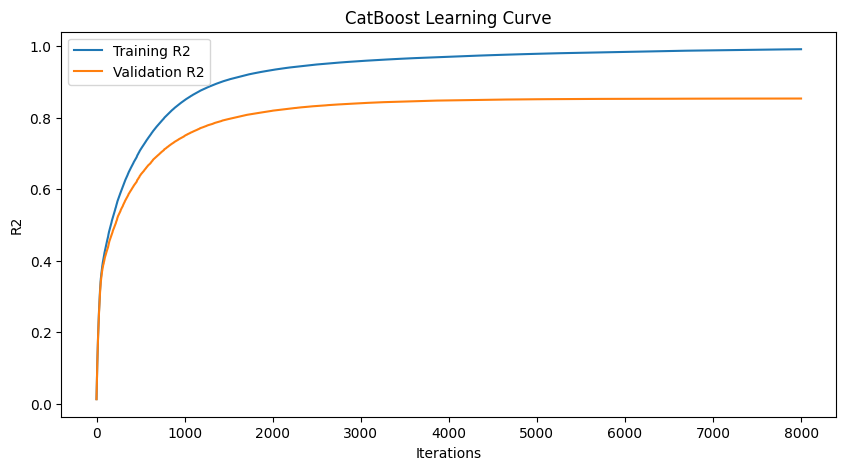

In [83]:
evals_result = cat_best.get_evals_result()

plt.figure(figsize=(10, 5))
plt.plot(evals_result['learn']['R2'], label='Training R2')
plt.plot(evals_result['validation']['R2'], label='Validation R2')
plt.title('CatBoost Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.legend()
plt.show()

# Examine Feature Importance

In [7]:
import pickle as pkl
model = pkl.load(open('model/cat_5.pkl', 'rb'))

In [18]:
X.shape

(8000, 55)

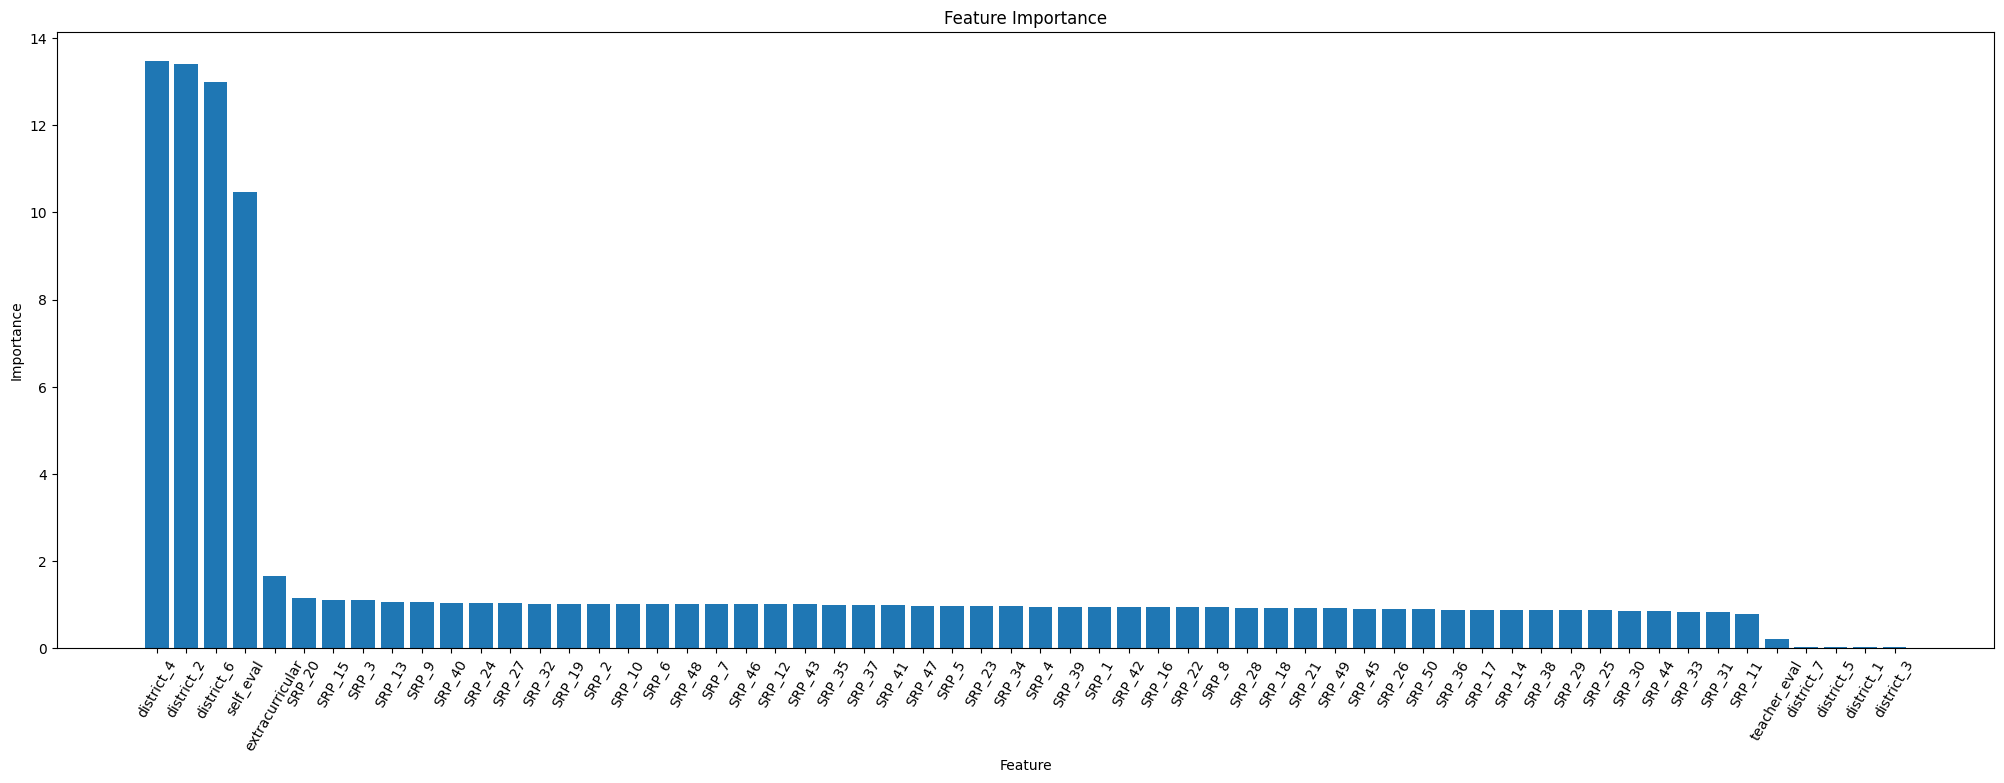

In [24]:
feature_names = ['self_eval', 'teacher_eval', 'extracurricular', 
       'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8',
       'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15',
       'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22',
       'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29',
       'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36',
       'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43',
       'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50','district_1', 'district_2', 'district_3', 'district_4', 'district_5', 'district_6', 'district_7']


# Get feature importance
feature_importance = model.get_feature_importance()

# Create a dictionary of feature importance with corresponding names
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted feature names and importance values
sorted_feature_names = [item[0] for item in sorted_feature_importance]
sorted_feature_values = [item[1] for item in sorted_feature_importance]

# Plot the sorted feature importance
plt.figure(figsize=(25, 8))
plt.bar(sorted_feature_names, sorted_feature_values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=60)
plt.title('Feature Importance')
plt.show()


# Use on test.csv

In [7]:
df_test = pd.read_csv('test.csv')
df_test.head()

,SEQN,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,...,SRP_41,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50
0,492834,1,1,5,3,-0.873,-0.337,-0.350,0.845,-0.437,...,0.025,0.154,-0.417,-1.672,2.029,1.802,-0.302,0.051,-0.350,1.438
1,309349,3,2,9,6,-0.948,1.002,-0.936,-0.100,1.134,...,0.079,0.189,1.065,-0.679,-2.169,1.265,0.828,0.078,-0.540,-1.024
2,468308,1,1,1,1,-0.356,0.283,0.708,0.740,-1.205,...,1.890,0.196,0.345,0.116,0.219,0.555,-0.829,0.019,0.906,2.146
3,838812,2,2,2,1,-0.135,-2.024,0.922,1.138,0.167,...,-0.035,0.496,-0.662,1.664,0.037,-1.263,0.043,-0.021,0.451,0.617
4,947936,4,4,8,6,-0.955,0.906,0.494,-0.020,-0.515,...,0.698,0.004,0.044,-0.977,1.434,-0.747,0.453,0.573,-1.039,-0.782


## EDA Test Data

In [19]:
df_test.district.value_counts()

district
2    604
3    580
4    578
1    567
6    560
5    560
7    551
Name: count, dtype: int64

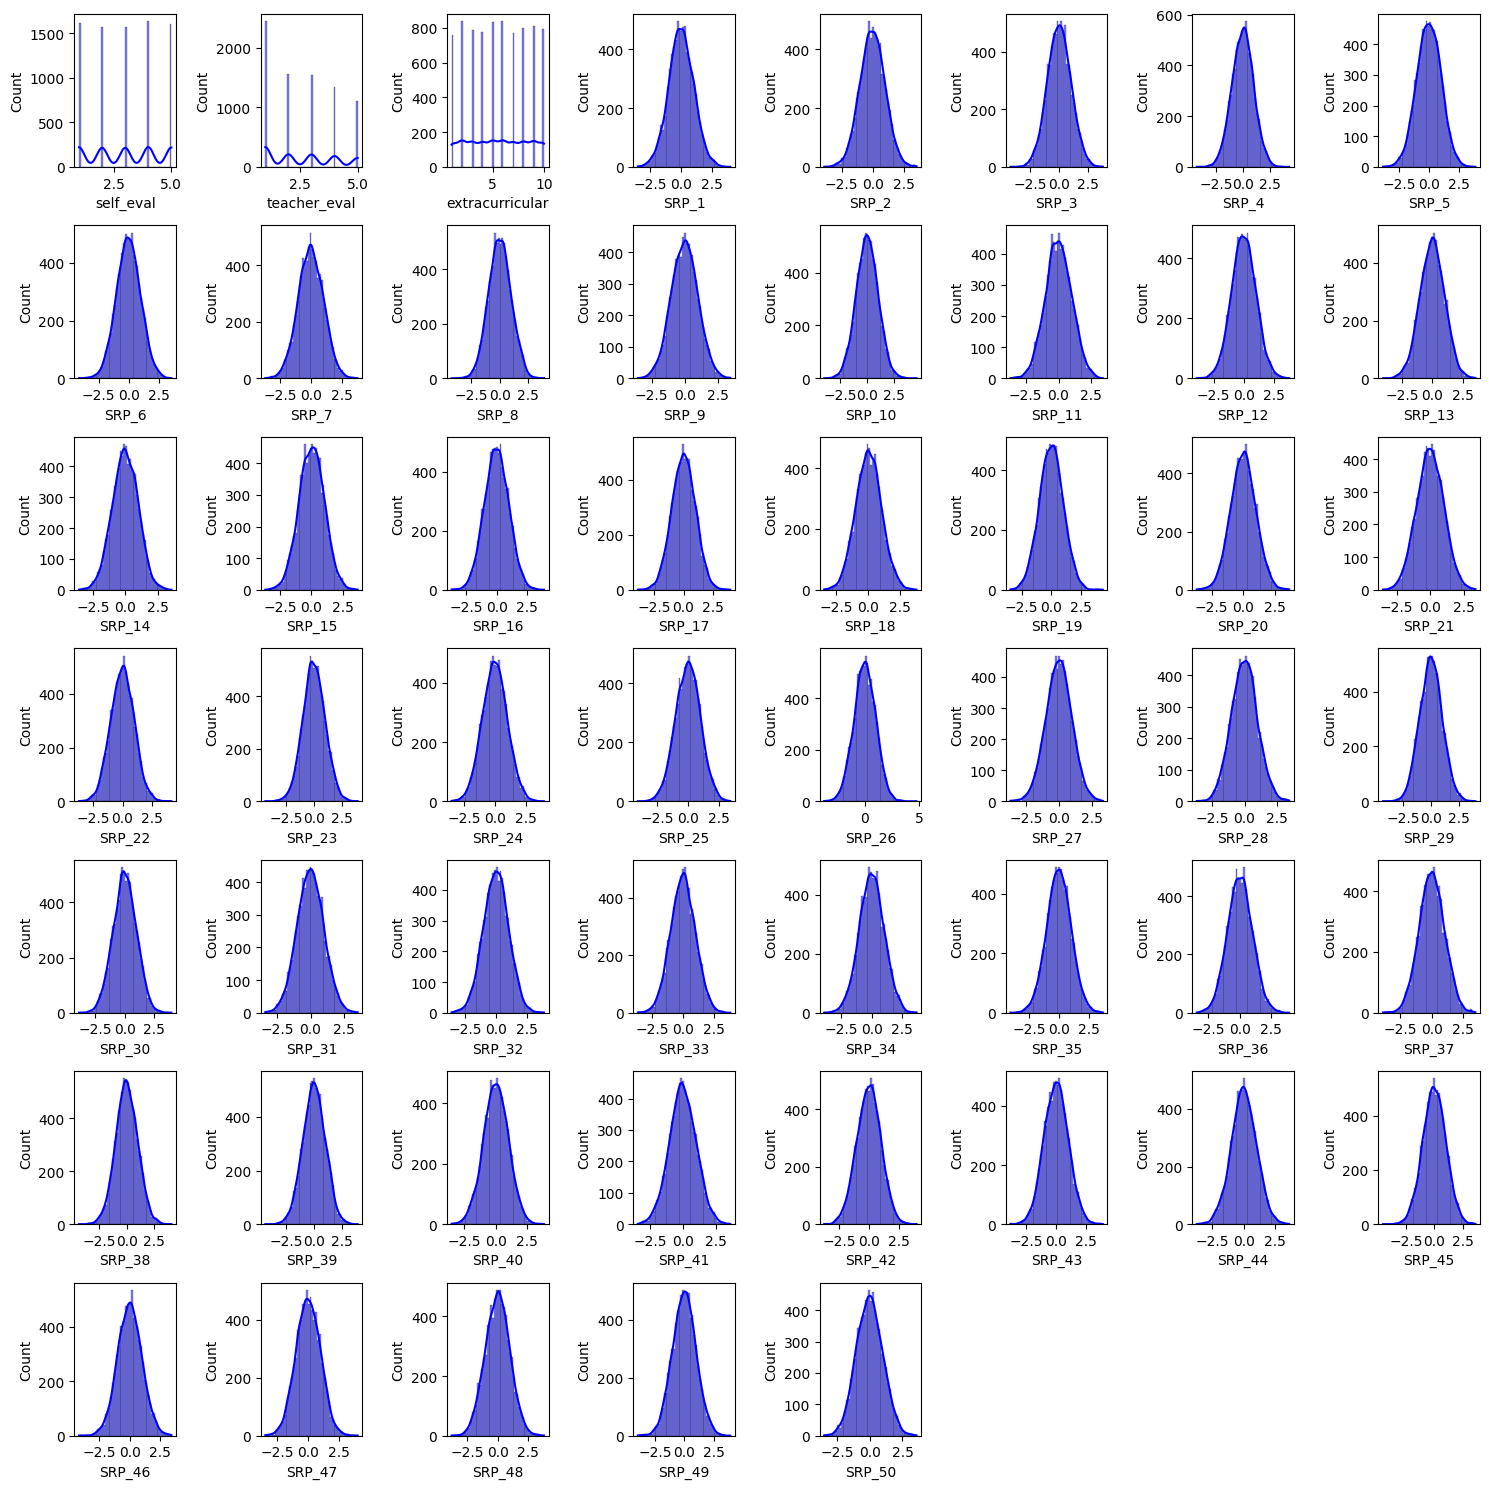

In [5]:
plt.figure(figsize=(15,15))

numerical_features = ['self_eval', 'teacher_eval', 'extracurricular', 'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']

for col in numerical_features:
    plt.subplot(7,8, numerical_features.index(col)+1)
    sns.histplot(df[col], color='b', bins=50, kde=True)

plt.tight_layout()
plt.show()

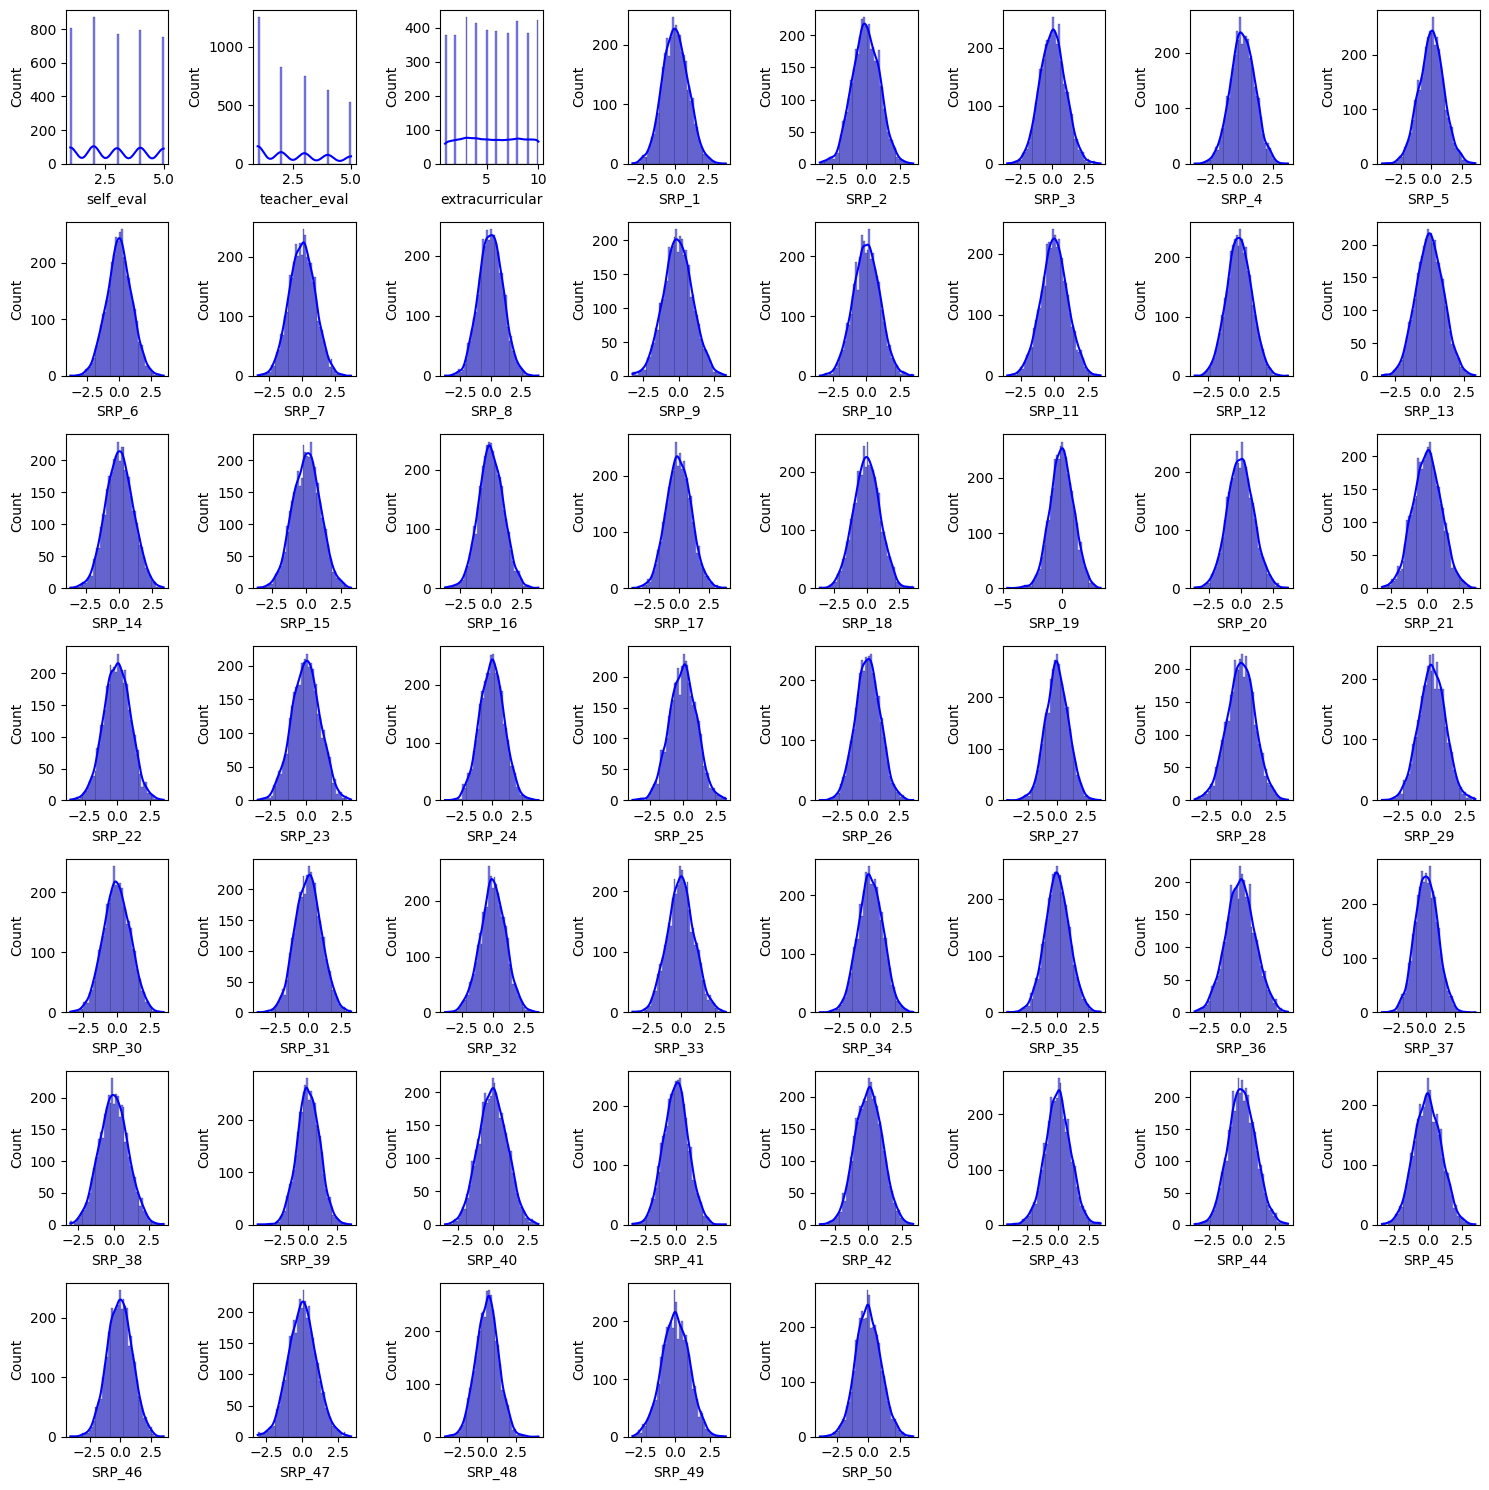

In [4]:
plt.figure(figsize=(15,15))

numerical_features = ['self_eval', 'teacher_eval', 'extracurricular', 'SRP_1', 'SRP_2', 'SRP_3', 'SRP_4', 'SRP_5', 'SRP_6', 'SRP_7', 'SRP_8', 'SRP_9', 'SRP_10', 'SRP_11', 'SRP_12', 'SRP_13', 'SRP_14', 'SRP_15', 'SRP_16', 'SRP_17', 'SRP_18', 'SRP_19', 'SRP_20', 'SRP_21', 'SRP_22', 'SRP_23', 'SRP_24', 'SRP_25', 'SRP_26', 'SRP_27', 'SRP_28', 'SRP_29', 'SRP_30', 'SRP_31', 'SRP_32', 'SRP_33', 'SRP_34', 'SRP_35', 'SRP_36', 'SRP_37', 'SRP_38', 'SRP_39', 'SRP_40', 'SRP_41', 'SRP_42', 'SRP_43', 'SRP_44', 'SRP_45', 'SRP_46', 'SRP_47', 'SRP_48', 'SRP_49', 'SRP_50']

for col in numerical_features:
    plt.subplot(7,8, numerical_features.index(col)+1)
    sns.histplot(df_test[col], color='b', bins=50, kde=True)

plt.tight_layout()
plt.show()

## Prediction

In [8]:
X_training = preproc_pipeline.fit_transform(X)
y_training = y

X_testing = preproc_pipeline.transform(df_test)

### do not bag MLP

In [16]:
model_final = MLPRegressor(**best_mlp_params, random_state=42)
model_final.fit(X_training, y_training)

MLPRegressor(activation='tanh', alpha=0.09991969600005995,
             hidden_layer_sizes=(10,), learning_rate='adaptive',
             learning_rate_init=0.0002942641161353928, max_iter=750,
             random_state=42)

In [17]:
import pickle
pickle.dump(model_final, open('model/mlp_3.pkl', 'wb'))

In [18]:
model_final_predictions = model_final.predict(X_testing)

submission = df_test[['SEQN']]
submission['y'] = model_final_predictions

### bag diff MLP random state

In [11]:
##  bootstrap + aggregating
best_mlp_params = {'max_iter': 101, 'hidden_layer_sizes': (10,),'activation':'tanh','alpha': 0.09991969600005995,'solver': 'adam','learning_rate': 'adaptive'}
mlp_bagging = BaggingRegressor(MLPRegressor(**best_mlp_params, random_state=42),
                               n_estimators=10, random_state=42)

mlp_bagging.fit(X_training, y_training)
mlp_bagging_predictions = mlp_bagging.predict(X_testing)

submission = df_test[['SEQN']]
submission['y'] = mlp_bagging_predictions

In [35]:
## merely aggregating

mlp_final_1 = MLPRegressor(**best_mlp_params, random_state=42)
mlp_final_1.fit(X_training, y_training)
mlp_final_predictions1 = mlp_final_1.predict(X_testing)

mlp_final_2 = MLPRegressor(**best_mlp_params, random_state=606)
mlp_final_2.fit(X_training, y_training)
mlp_final_predictions2 = mlp_final_2.predict(X_testing)

mlp_final_3 = MLPRegressor(**best_mlp_params, random_state=8888)
mlp_final_3.fit(X_training, y_training)
mlp_final_predictions3 = mlp_final_3.predict(X_testing)


submission = df_test[['SEQN']]
submission['y'] = (mlp_final_predictions1 + mlp_final_predictions2 + mlp_final_predictions3) / 3

In [ ]:
import pickle

# Specify the filepath of the saved model
filepath = "path/to/model.pkl"

# Load the model
with open(filepath, "rb") as file:
    model = pickle.load(file)

# Now you can use the loaded model for predictions or other tasks


## bag diff random state catboost

In [160]:
cat_final_1 = CatBoostRegressor(verbose=0, random_state=42, eval_metric='R2', **best_param)
cat_final_1.fit(X_training, y_training)
cat_final_predictions1 = cat_final_1.predict(X_testing)

cat_final_2 = CatBoostRegressor(verbose=0, random_state=606, eval_metric='R2', **best_param)
cat_final_2.fit(X_training, y_training)
cat_final_predictions2 = cat_final_2.predict(X_testing)

cat_final_3 = CatBoostRegressor(verbose=0, random_state=8888, eval_metric='R2', **best_param)
cat_final_3.fit(X_training, y_training)
cat_final_predictions3 = cat_final_3.predict(X_testing)

submission = df_test[['SEQN']]
submission['y'] = (cat_final_predictions1 + cat_final_predictions2 + cat_final_predictions3) / 3

## do not bag catboost

In [ ]:
cat_final = CatBoostRegressor(verbose=0, random_state=42, eval_metric='R2', **best_param)
cat_final.fit(X_training, y_training)

In [151]:
import pickle
pickle.dump(cat_final, open('model/cat_7.pkl', 'wb'))

In [152]:
cat_final_predictions = cat_final.predict(X_testing)

In [153]:
submission = df_test[['SEQN']]
submission['y'] = cat_final_predictions

## save submission

In [12]:
submission.to_csv('submission/503kaggle_submission_17.csv', index=False)

## submission 10 the best